# Lorentz attractor in Python

this script plots the lorentz attractor with the help of numpy, scipy and matlplotlib

![](L1_02698.png)

The Lorentz equations are as following
$$\begin{aligned}{\dot  x}&=a(y-x)\\{\dot  y}&=x(b-z)-y\\{\dot  z}&=xy-cz\end{aligned}$$





In [34]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import csv
from matplotlib.collections import LineCollection

In [35]:


# Lorenz paramters and initial conditions.
a, b, c = 10, 28, 8/3 #opt1
#a, b, c = 10, 15, 8/3

x0, y0, z0 = 0, 1, 0

# Maximum time point and total number of time points.
tmax, n = 100, 10000

In [36]:
def lorenz(t, X, a, c, b):
    """The Lorenz equations."""
    x, y, z = X
    dx = a*(y - x)
    dy = b*x - y - x*z
    dz = -c*z + x*y
    return dx, dy, dz

In [37]:
# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, tmax), (x0, y0, z0), args=(a, c, b),
                 dense_output=True)

In [38]:
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

xyz=np.array((x,y,z))
np.shape(xyz)

(3, 10000)

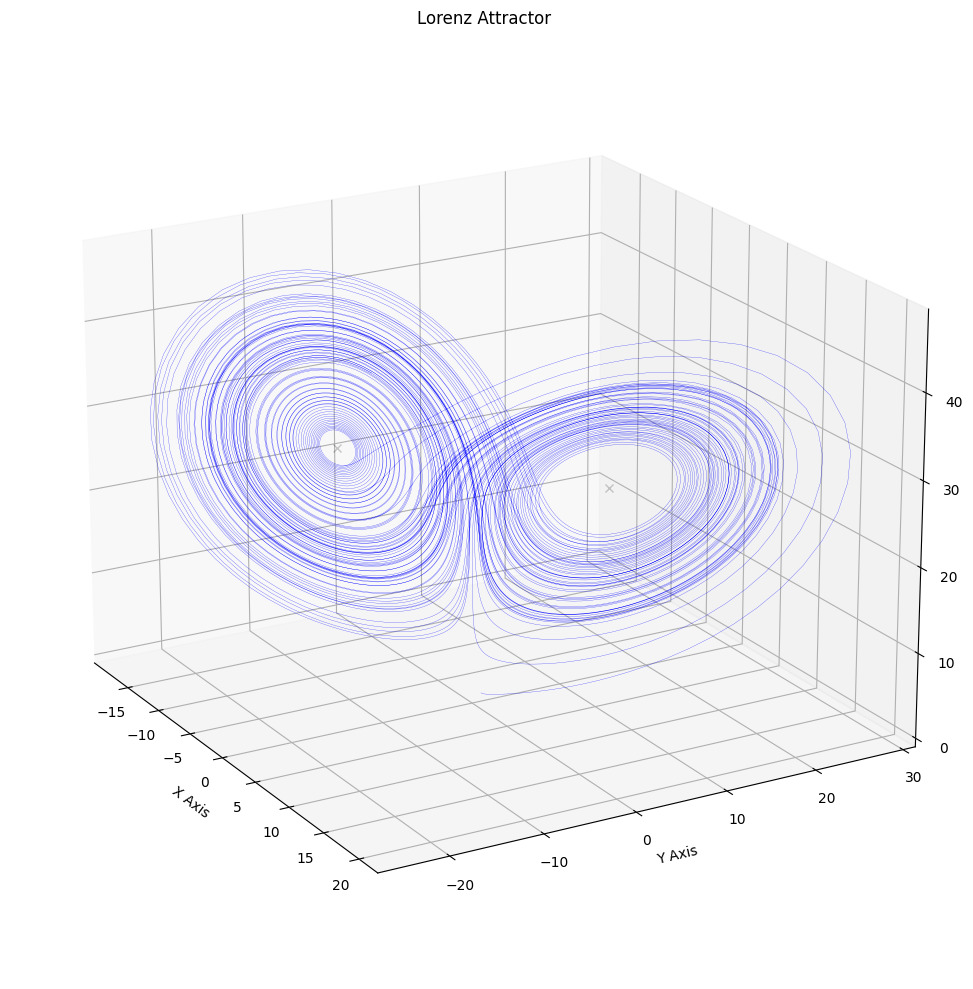

In [91]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.plot(*xyz[:,0:10000],'b', alpha=0.8, linewidth=.2)
ax.plot(6*np.sqrt(2),6*np.sqrt(2),27,'kx',alpha=0.2)
ax.plot(-6*np.sqrt(2),-6*np.sqrt(2),27,'kx',alpha=0.2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

ax.view_init(20,-30, 0)

plt.grid(True)
plt.axis('on')
plt.tight_layout()


plt.show()



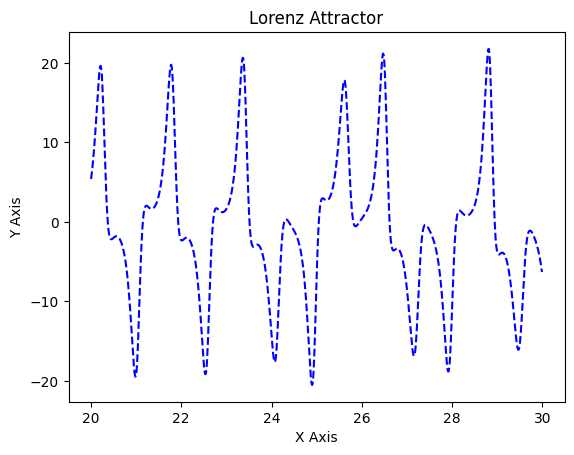

In [54]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
l_start=2000
l_end=3000
t1=t[l_start:l_end]
x1=xyz[0,l_start:l_end]
y1=xyz[1,l_start:l_end]
z1=xyz[2,l_start:l_end]
delta_xy=x1-y1
y1
ax = plt.figure().add_subplot()

#ax.plot(t1,x1,'r--')
ax.plot(t1,y1,'b--')
#ax.plot(t1,z1,'k--')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("Lorenz Attractor")

plt.savefig("test1.png")
plt.show()

In [135]:
txyz=np.array((t, x, y, z))
with open('Data\Lorentz4.csv', 'w', newline='') as csvfile:
    Lo_writer = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for coords in txyz.T:
        Lo_writer.writerow(coords,)